In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
df_interaction = pd.read_csv("../data/raw/RAW_interactions.csv")

In [22]:
df_interaction.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [23]:
df_recipe = pd.read_csv("../data/raw/RAW_recipes.csv")

In [24]:
df_recipe.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


**I) Analyse Univariée : Reviews**

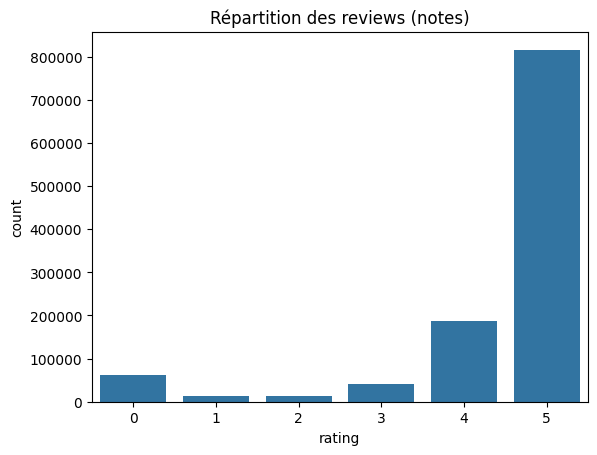

Note moyenne globale : 4.41


In [25]:
# Distribution des notes
sns.countplot(x="rating", data=df_interaction)
plt.title("Répartition des reviews (notes)")
plt.show()

# Moyenne des notes
mean_rating = df_interaction["rating"].mean()
print("Note moyenne globale :", round(mean_rating, 2))

**Distribution du nombre de reviews par recette**

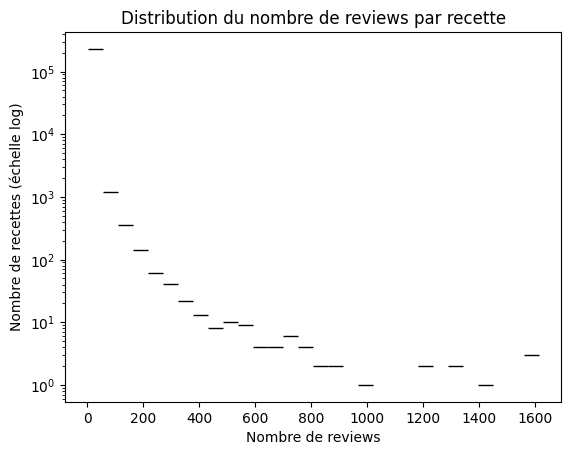

In [26]:
reviews_per_recipe = df_interaction.groupby("recipe_id").size()
# Vicusalisation
sns.histplot(
    reviews_per_recipe, bins=30, log_scale=(False, True)
)  # échelle log pour mieux visualiser
plt.title("Distribution du nombre de reviews par recette")
plt.xlabel("Nombre de reviews")
plt.ylabel("Nombre de recettes (échelle log)")
plt.show()

/var/folders/73/zx24sp5s3sn2p2j35t94kt6h0000gn/T/ipykernel_2375/2806281224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


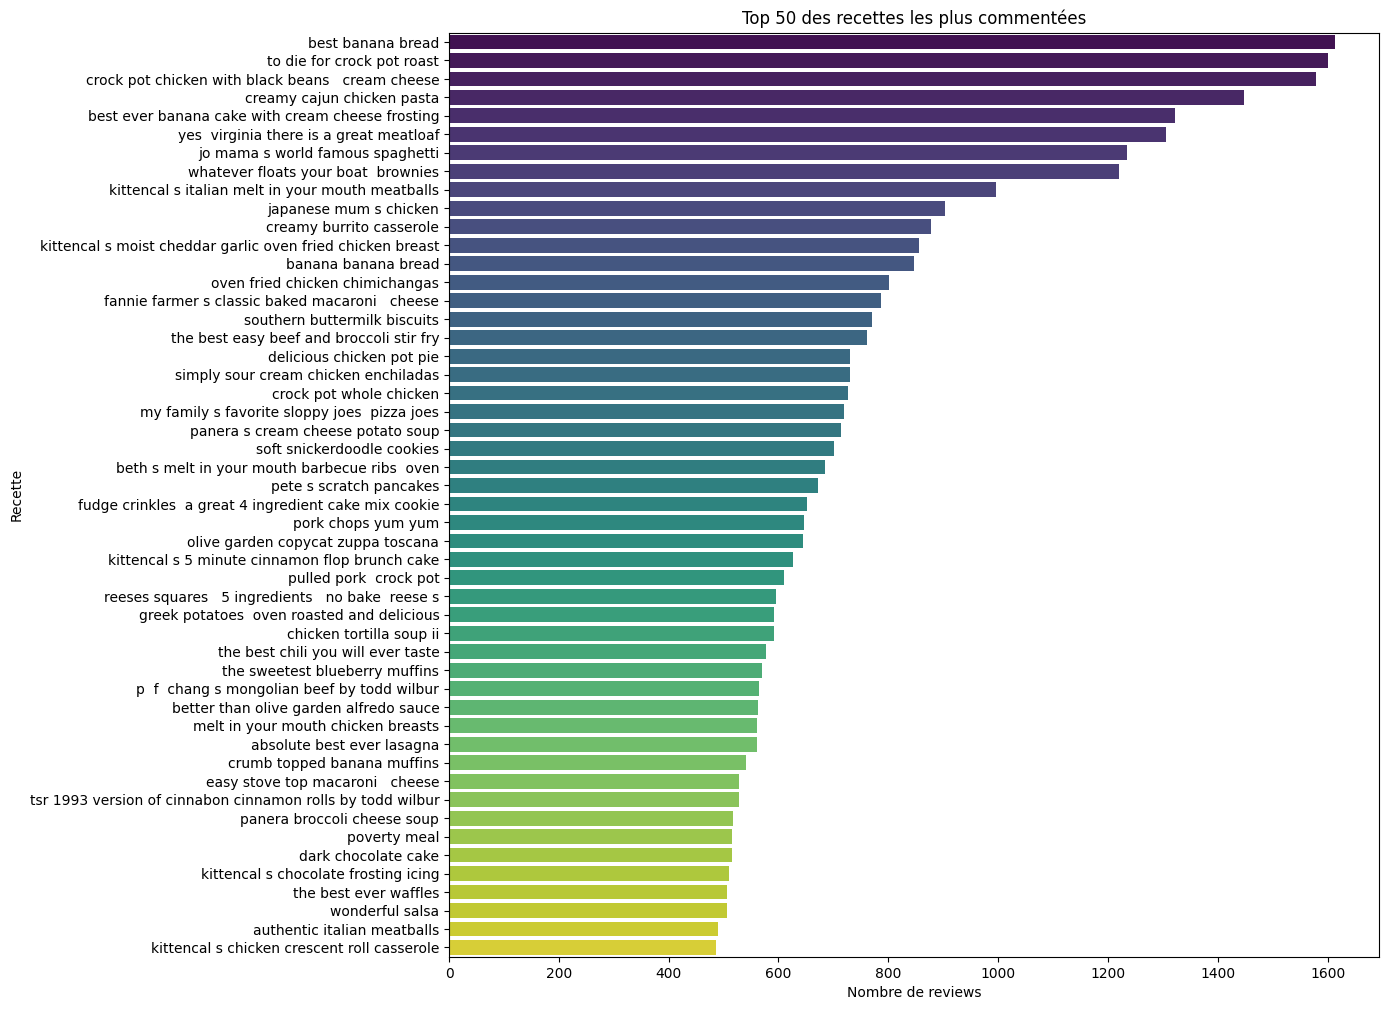

In [27]:
# Recettes les plus commentées
nb_recettes = 50
top_recipes = df_interaction["recipe_id"].value_counts().head(nb_recettes)
# On merge avec df_recipe pour récupérer le nom
top_recipes_df = top_recipes.reset_index()  # transforme en DataFrame
top_recipes_df.columns = ["recipe_id", "nb_reviews"]
# Ajout du nom
top_recipes_df = top_recipes_df.merge(
    df_recipe[["id", "name"]], left_on="recipe_id", right_on="id", how="left"
)
# Affichage final
# print(top_recipes_df[['recipe_id', 'name', 'nb_reviews']])
# Plot
plt.figure(figsize=(12, 12))
sns.barplot(
    data=top_recipes_df.sort_values("nb_reviews", ascending=False),
    x="nb_reviews",
    y="name",
    palette="viridis",
)

plt.title(f"Top {nb_recettes} des recettes les plus commentées")
plt.xlabel("Nombre de reviews")
plt.ylabel("Recette")
plt.show()

/var/folders/73/zx24sp5s3sn2p2j35t94kt6h0000gn/T/ipykernel_2375/4268498084.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_best, x='mean_rating', y='name', palette='crest')


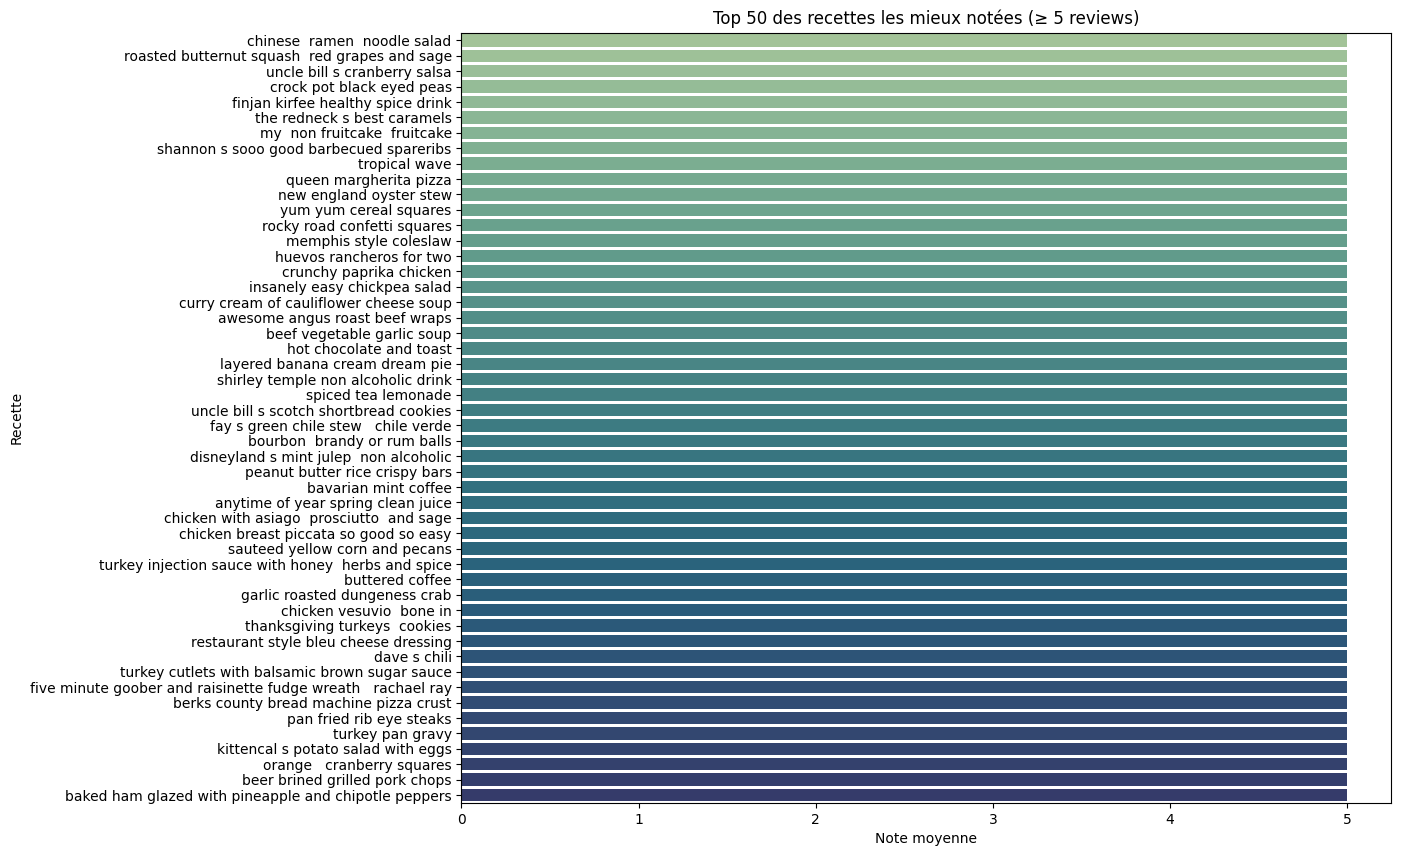

/var/folders/73/zx24sp5s3sn2p2j35t94kt6h0000gn/T/ipykernel_2375/4268498084.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_worst, x='mean_rating', y='name', palette='rocket')


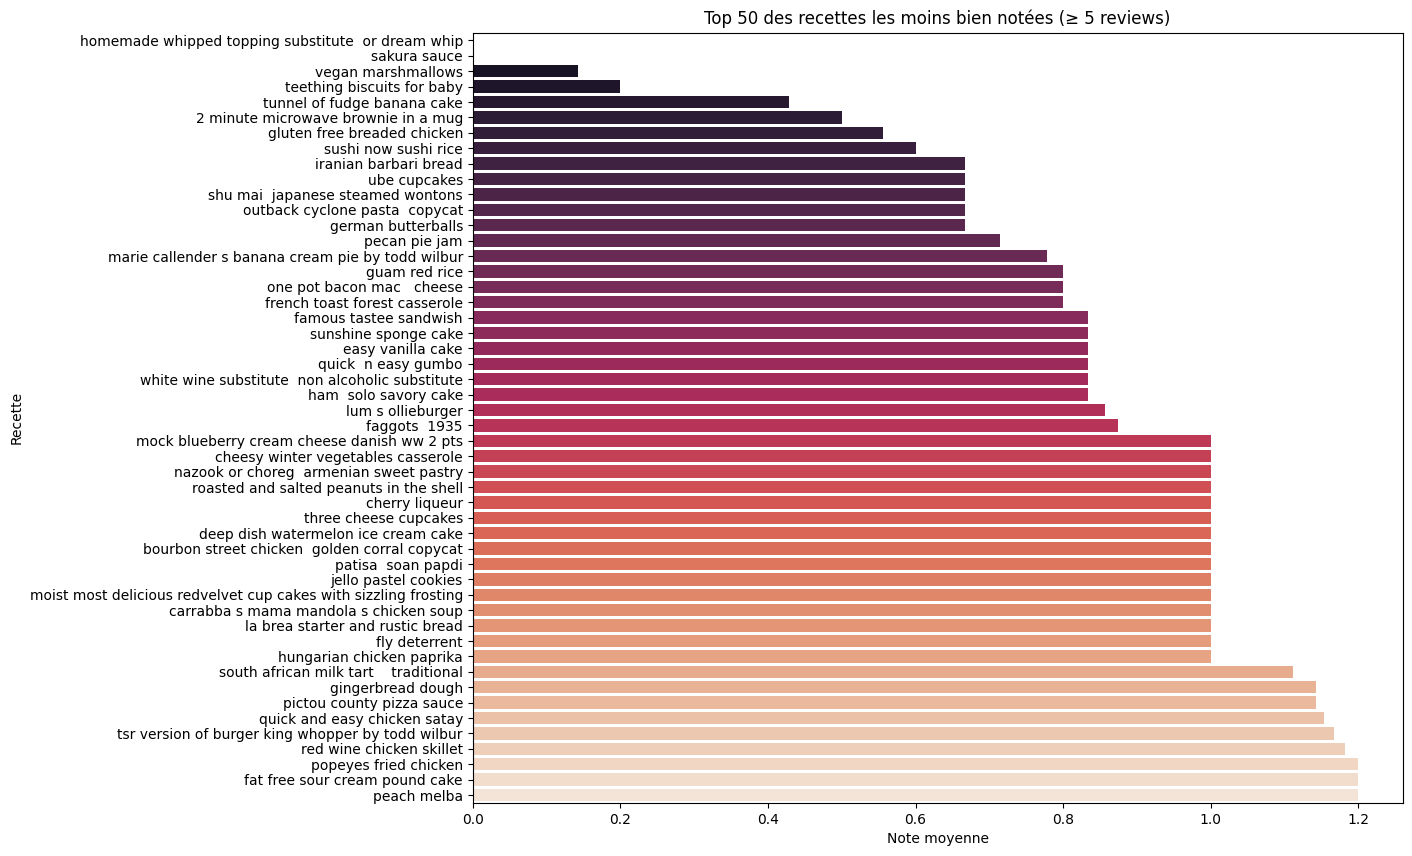

In [36]:
# Moyenne des notes et nombre de reviews par recette
recipe_ratings = (
    df_interaction.groupby("recipe_id")["rating"].agg(["mean", "count"]).reset_index()
)
recipe_ratings.columns = ["recipe_id", "mean_rating", "nb_reviews"]

# On fusionne avec df_recipe pour avoir le nom de la recette
recipe_ratings = recipe_ratings.merge(
    df_recipe[["id", "name"]], left_on="recipe_id", right_on="id", how="left"
)

# Pour éviter les recettes avec très peu de reviews (bruit statistique)
# On garde seulement les recettes avec au moins 5 reviews
filtered_recipes = recipe_ratings[recipe_ratings["nb_reviews"] >= 5]

# Top 20 des recettes les mieux notées
top_best = filtered_recipes.sort_values("mean_rating", ascending=False).head(
    nb_recettes
)

# Top 20 des recettes les moins bien notées
top_worst = filtered_recipes.sort_values("mean_rating", ascending=True).head(
    nb_recettes
)

# --- VISUALISATION ---
plt.figure(figsize=(12, 10))
sns.barplot(data=top_best, x="mean_rating", y="name", palette="crest")
plt.title(f"Top {nb_recettes} des recettes les mieux notées (≥ 5 reviews)")
plt.xlabel("Note moyenne")
plt.ylabel("Recette")
plt.show()

plt.figure(figsize=(12, 10))
sns.barplot(data=top_worst, x="mean_rating", y="name", palette="rocket")
plt.title(f"Top {nb_recettes} des recettes les moins bien notées (≥ 5 reviews)")
plt.xlabel("Note moyenne")
plt.ylabel("Recette")
plt.show()

In [29]:
# Check des ratings mal renseignés :
# missing_ratings = df_interaction['rating'].isna().sum()
# print("Nombre de reviews sans note :", missing_ratings)

**Repartition des reviews par utilisateur**

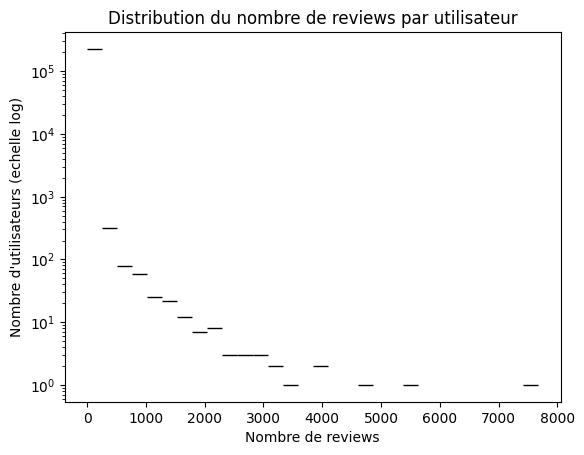

In [30]:
reviews_per_user = df_interaction.groupby("user_id").size()
# Statistiques descriptives
# print("Statistiques du nombre de reviews par utilisateur :")
# print(reviews_per_user.describe())

sns.histplot(reviews_per_user, bins=30, log_scale=(False, True))
plt.title("Distribution du nombre de reviews par utilisateur")
plt.xlabel("Nombre de reviews")
plt.ylabel("Nombre d'utilisateurs (echelle log)")
plt.show()

/var/folders/73/zx24sp5s3sn2p2j35t94kt6h0000gn/T/ipykernel_2375/3628552415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_categories.index, y=user_categories.values, palette='Blues_r')


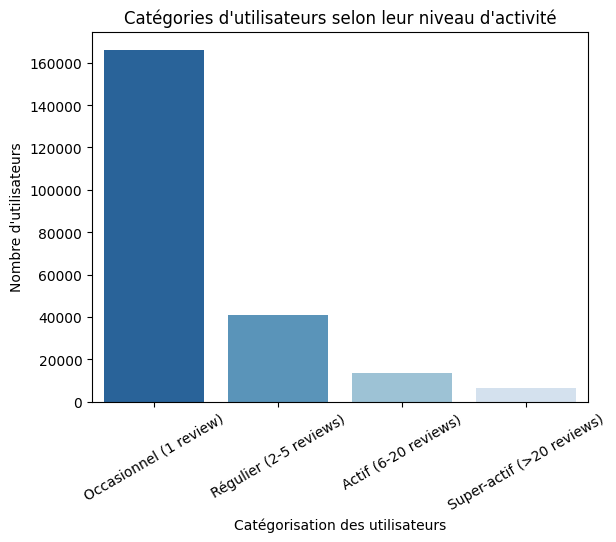

In [31]:
def categorize_user(n):
    if n == 1:
        return "Occasionnel (1 review)"
    elif n <= 5:
        return "Régulier (2-5 reviews)"
    elif n <= 20:
        return "Actif (6-20 reviews)"
    else:
        return "Super-actif (>20 reviews)"


user_categories = reviews_per_user.apply(categorize_user).value_counts()

sns.barplot(x=user_categories.index, y=user_categories.values, palette="Blues_r")
plt.title("Catégories d'utilisateurs selon leur niveau d'activité")
plt.ylabel("Nombre d'utilisateurs")
plt.xlabel("Catégorisation des utilisateurs")
plt.xticks(rotation=30)
plt.show()

**II) Analyse bivariée : Reviews en fonction du contributeur**

In [32]:
# Top 10 des utilisateurs les plus actifs
top_users = df_interaction["user_id"].value_counts().head(10)
top_users_list = top_users.index.tolist()

# Filtrer le dataset pour ne garder que ces contributeurs
df_top_users = df_interaction[df_interaction["user_id"].isin(top_users_list)]

# Moyenne des notes par utilisateur
mean_rating_per_user = (
    df_top_users.groupby("user_id")["rating"].mean().sort_values(ascending=False)
)
print(mean_rating_per_user)

user_id
424680    4.966888
89831     4.940352
305531    4.939697
128473    4.908348
199848    4.831014
37449     4.783866
383346    4.755186
133174    4.720953
169430    4.693327
58104     4.641727
Name: rating, dtype: float64


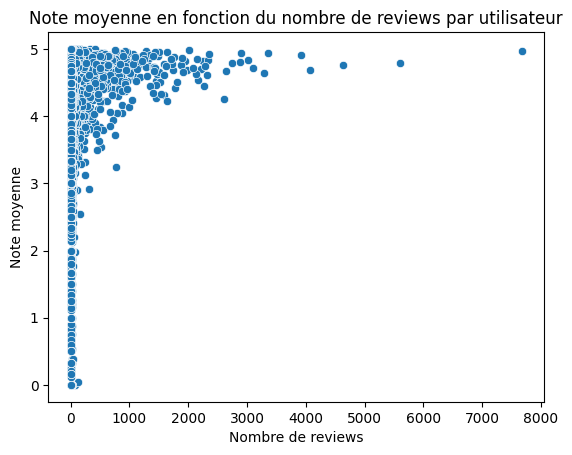

In [33]:
df_user_stats = (
    df_interaction.groupby("user_id")
    .agg(
        nb_reviews=("rating", "count"),
        mean_rating=("rating", "mean"),
    )
    .reset_index()
)

sns.scatterplot(x="nb_reviews", y="mean_rating", data=df_user_stats)
plt.xlabel("Nombre de reviews")
plt.ylabel("Note moyenne")
plt.title("Note moyenne en fonction du nombre de reviews par utilisateur")
plt.show()

/var/folders/73/zx24sp5s3sn2p2j35t94kt6h0000gn/T/ipykernel_2375/1185966.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Année")


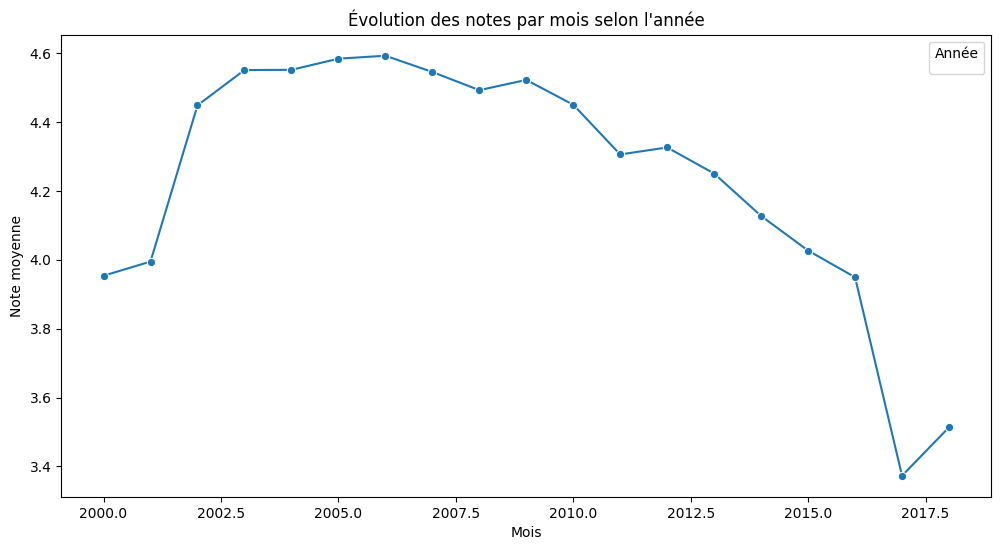

In [34]:
# S'assurer que la colonne date est bien au format datetime
df_interaction["date"] = pd.to_datetime(df_interaction["date"], errors="coerce")

# Extraire le mois et l'année
df_interaction["year"] = df_interaction["date"].dt.year
df_interaction["month"] = df_interaction["date"].dt.month
# Moyenne des notes par année et mois
monthly_ratings = df_interaction.groupby(["year"])["rating"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ratings, x="year", y="rating", marker="o")
plt.xlabel("Mois")
plt.ylabel("Note moyenne")
plt.title("Évolution des notes par mois selon l'année")
plt.legend(title="Année")
plt.show()

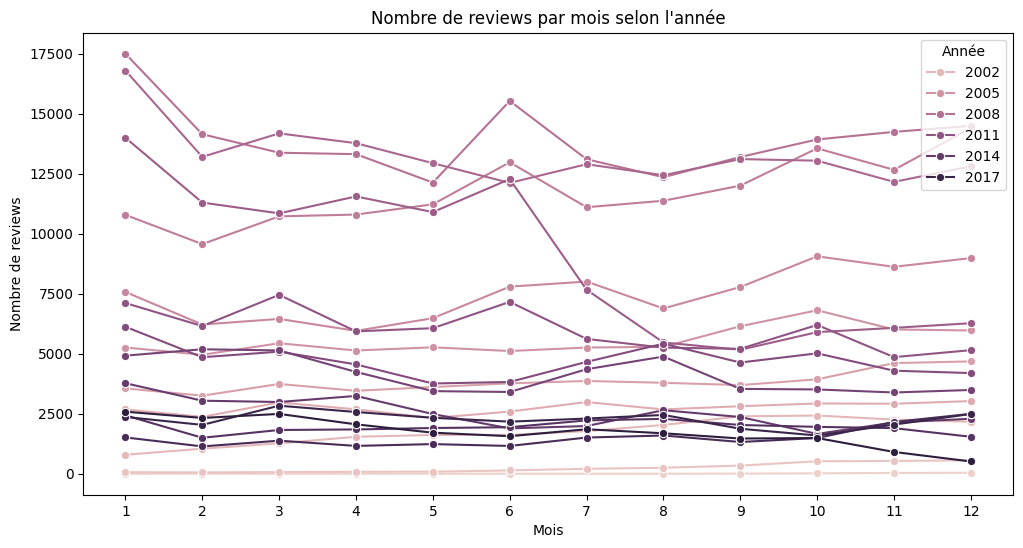

In [35]:
monthly_counts = (
    df_interaction.groupby(["year", "month"]).size().reset_index(name="nb_reviews")
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x="month", y="nb_reviews", hue="year", marker="o")
plt.xticks(range(1, 13))
plt.xlabel("Mois")
plt.ylabel("Nombre de reviews")
plt.title("Nombre de reviews par mois selon l'année")
plt.legend(title="Année")
plt.show()